Read Data
Selecting features =  60
Depth = 2
n_estimators = 100
accuracy =  0.675955555556
n_estimators = 150
accuracy =  0.674488888889
n_estimators = 200
accuracy =  0.675066666667
n_estimators = 300
accuracy =  0.674311111111
n_estimators = 400
accuracy =  0.674344444444


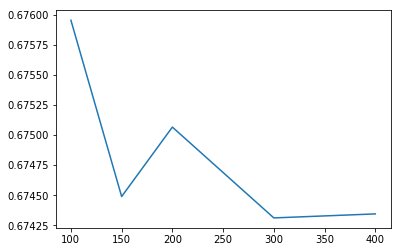

Depth = 5
n_estimators = 100
accuracy =  0.615322222222
n_estimators = 150
accuracy =  0.611733333333
n_estimators = 200
accuracy =  0.612144444444
n_estimators = 300


KeyboardInterrupt: 

In [4]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainFeatures.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabel.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validationFeatures.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

k = [60, 80, 100, 120, 140]
maX = 0
depth = [2, 5, 7, 10, 15, 20]
n_esti = [100, 150, 200, 300, 400]

for i in range(len(k)):
    print("Selecting features = ", k[i])
    selection = SelectKBest(k=k[i]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)

    accuracy = []
    for j in range(len(depth)):
        print("Depth =", depth[j])

        for ij in range(len(n_esti)):
            print("n_estimators =", n_esti[ij])
            clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=depth[j]), n_estimators = n_esti[ij], 
                                     learning_rate=2, random_state=0)
            clf.fit(n_trainX_new, trainLabel)
            # compute accuracy
            result = clf.score(n_testX_new, testLabel)
            print("accuracy = ", result)
            accuracy.append(result)
            if (result > 0.78 and result > maX):
                maX = result
                print("Predict and write to file")
                answer = clf.predict(n_testdata_new)
                numpy.savetxt('result.csv', result, delimiter=',', fmt='%d')
        plt.plot(n_esti, accuracy)
        plt.show()

